<a href="https://colab.research.google.com/github/Yogabeeram/Intern-Spark-Advanced-Match/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
teams=pd.read_csv('/content/teams.csv')

In [9]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [10]:
teams=teams[["team","country","year","athletes","age","prev_medals","medals"]]

In [11]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [12]:
teams.head()

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0


In [13]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team         2144 non-null   object 
 1   country      2144 non-null   object 
 2   year         2144 non-null   int64  
 3   athletes     2144 non-null   int64  
 4   age          2144 non-null   float64
 5   prev_medals  2014 non-null   float64
 6   medals       2144 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 117.4+ KB


In [14]:
teams.describe()

,year,athletes,age,prev_medals,medals
count,2144.000000,2144.000000,2144.000000,2014.000000,2144.000000
mean,1994.507463,73.693097,24.778591,10.248759,10.556437
std,15.384205,127.907577,2.808559,31.951920,33.028143
min,1964.000000,1.000000,17.000000,0.000000,0.000000
25%,1984.000000,7.000000,23.275000,0.000000,0.000000
50%,1996.000000,19.000000,24.700000,0.000000,0.000000
75%,2008.000000,70.250000,26.100000,4.000000,4.000000
max,2016.000000,839.000000,66.000000,442.000000,442.000000


In [15]:
teams["medals"].describe()

,medals
count,2144.000000
mean,10.556437
std,33.028143
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,442.000000


In [16]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [17]:
teams.isnull().sum()

,0
team,0
country,0
year,0
athletes,0
age,0
prev_medals,130
medals,0


In [18]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


we use dropna here to remove all the Nan values.

In [19]:
teams=teams.dropna()

to display we giving the teams name

In [20]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


correlation means linear regression containing straight lines having points and the relation between those points is  called correlation

In [21]:
teams.corr()["medals"]

ValueError: could not convert string to float: 'AFG'

In [22]:
teams.drop(columns=["team","country"]).corr()["medals"]

,medals
year,-0.034870
athletes,0.839909
age,0.023231
prev_medals,0.920048
medals,1.000000


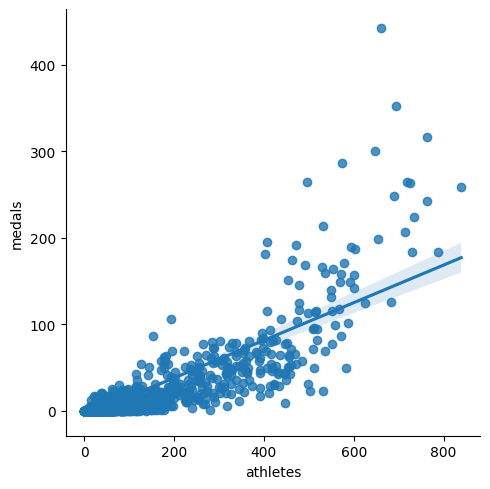

In [23]:
sns.lmplot(x="athletes",y="medals",data=teams)

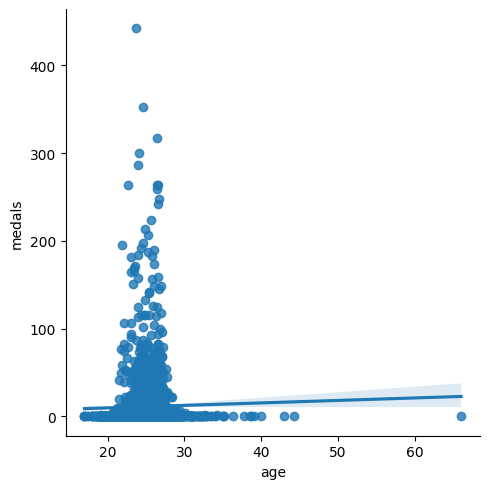

In [24]:
sns.lmplot(x="age",y="medals",data=teams)

<Axes: ylabel='Frequency'>

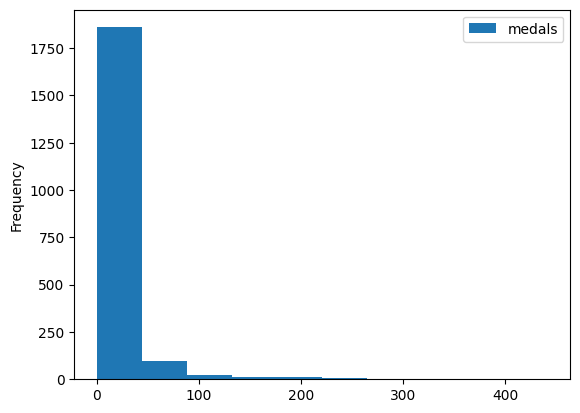

In [25]:
teams.plot.hist(y="medals")

<Axes: xlabel='athletes', ylabel='medals'>

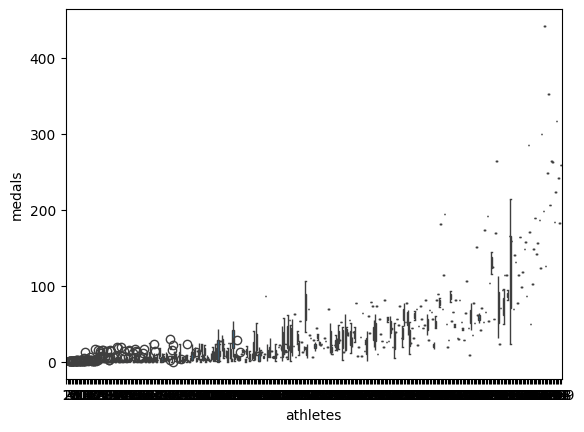

In [26]:
sns.boxplot(x="athletes",y="medals",data=teams)

In [27]:
#transformation technique
teams["age2"]=np.log(teams["age"])

/tmp/ipython-input-1045328499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams["age2"]=np.log(teams["age"])


In [28]:
teams

,team,country,year,athletes,age,prev_medals,medals,age2
0,AFG,Afghanistan,1964,8,22.0,0.0,0,3.091042
1,AFG,Afghanistan,1968,5,23.2,0.0,0,3.144152
2,AFG,Afghanistan,1972,8,29.0,0.0,0,3.367296
3,AFG,Afghanistan,1980,11,23.6,0.0,0,3.161247
4,AFG,Afghanistan,2004,5,18.6,0.0,0,2.923162
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0,3.218876
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3,3.222868
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4,3.261935
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,3.306887


In [31]:
teams=teams.drop(columns=["age2"])

In [32]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [34]:
train=teams[teams["year"]<2012].copy()
test=teams[teams["year"]>=2012].copy()

In [35]:
train.shape

(1609, 7)

In [36]:
test.shape

(405, 7)

In [37]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()